In [1]:
import numpy as np
import math
import pandas 
import random 
import time
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
dataframe = pandas.read_csv("ionosphere_data.csv")



In [3]:
print(dataframe.head())

   1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0

In [4]:
print(dataframe.describe())

                1      0     0.99539    -0.05889     0.85243     0.02306  \
count  350.000000  350.0  350.000000  350.000000  350.000000  350.000000   
mean     0.891429    0.0    0.640330    0.044667    0.600350    0.116154   
std      0.311546    0.0    0.498059    0.442032    0.520431    0.461443   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.471518   -0.065388    0.412555   -0.024868   
50%      1.000000    0.0    0.870795    0.016700    0.808620    0.021170   
75%      1.000000    0.0    1.000000    0.194727    1.000000    0.335318   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

          0.83398    -0.37708         1.1     0.03760  ...     0.56811  \
count  350.000000  350.000000  350.000000  350.000000  ...  350.000000   
mean     0.549284    0.120779    0.510453    0.181756  ...    0.395643   
std      0.493124    0.520816    0.507117    0.484482  ...    0.579206   
min     -1.000000  

In [5]:
print("Shape:", dataframe.shape)

Shape: (350, 35)


In [6]:
print("Data Types:", dataframe.dtypes)

Data Types: 1              int64
0              int64
0.99539      float64
-0.05889     float64
0.85243      float64
0.02306      float64
0.83398      float64
-0.37708     float64
1.1          float64
0.03760      float64
0.85243.1    float64
-0.17755     float64
0.59755      float64
-0.44945     float64
0.60536      float64
-0.38223     float64
0.84356      float64
-0.38542     float64
0.58212      float64
-0.32192     float64
0.56971      float64
-0.29674     float64
0.36946      float64
-0.47357     float64
0.56811      float64
-0.51171     float64
0.41078      float64
-0.46168     float64
0.21266      float64
-0.34090     float64
0.42267      float64
-0.54487     float64
0.18641      float64
-0.45300     float64
g             object
dtype: object


In [7]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                   1   0   0.99539  -0.05889   0.85243   0.02306   0.83398  \
1          1.000000 NaN  0.301596 -0.006297  0.155750  0.127836  0.221436   
0               NaN NaN       NaN       NaN       NaN       NaN       NaN   
0.99539    0.301596 NaN  1.000000  0.143957  0.476106  0.026199  0.439608   
-0.05889  -0.006297 NaN  0.143957  1.000000  0.001477 -0.190469 -0.053673   
0.85243    0.155750 NaN  0.476106  0.001477  1.000000  0.038617  0.596761   
0.02306    0.127836 NaN  0.026199 -0.190469  0.038617  1.000000 -0.009900   
0.83398    0.221436 NaN  0.439608 -0.053673  0.596761 -0.009900  1.000000   
-0.37708   0.028071 NaN  0.010682  0.254716 -0.028520  0.274571 -0.149115   
1.1        0.188565 NaN  0.470618 -0.302097  0.449869 -0.120323  0.461131   
0.03760   -0.051602 NaN  0.048563  0.207541 -0.033840  0.199945 -0.089832   
0.85243.1  0.033499 NaN  0.324097 -0.189778  0.449341 -0.291265  0.412233   
-0.17755   0.072946 NaN  0.171587  0.315656  0.043871  0.163661

In [8]:
print(dataframe.values)

[[1 0 1.0 ... -0.13738 -0.02447 'b']
 [1 0 1.0 ... 0.56045 -0.38238 'g']
 [1 0 1.0 ... -0.32382 1.0 'b']
 ...
 [1 0 0.94701 ... 0.9269700000000001 -0.00577 'g']
 [1 0 0.9060799999999999 ... 0.87403 -0.16243 'g']
 [1 0 0.8471 ... 0.85764 -0.06151 'g']]


In [9]:
#shuffle
dataset = np.array(dataframe.values)
dataset_shuf = []
index_shuf = list(range(len(dataset)))
random.shuffle(index_shuf)
for i in index_shuf:
    dataset_shuf.append(dataset[i,:])   
dataset_shuf = np.array(dataset_shuf)
dataset_shuf.reshape(350,35)

array([[1, 0, 1.0, ..., 1.0, 0.0, 'g'],
       [1, 0, 0.94052, ..., 0.9204899999999999, -0.0742, 'g'],
       [0, 0, -1.0, ..., 0.0, 0.0, 'b'],
       ...,
       [1, 0, 1.0, ..., -0.13341, -1.0, 'g'],
       [1, 0, 0.84177, ..., -0.004220000000000001, 0.69409, 'g'],
       [1, 0, 0.88103, ..., 0.9174700000000001, -0.16827, 'g']],
      dtype=object)

In [10]:
#ont hot g = 0 b = 1
for i in range(350) :
    if dataset_shuf[i,34] == 'g' :
        dataset_shuf[i,34] = 0
    elif dataset_shuf[i,34] == 'b' :
        dataset_shuf[i,34] = 1
print(dataset_shuf)

[[1 0 1.0 ... 1.0 0.0 0]
 [1 0 0.94052 ... 0.9204899999999999 -0.0742 0]
 [0 0 -1.0 ... 0.0 0.0 1]
 ...
 [1 0 1.0 ... -0.13341 -1.0 0]
 [1 0 0.84177 ... -0.004220000000000001 0.69409 0]
 [1 0 0.88103 ... 0.9174700000000001 -0.16827 0]]


In [11]:
X_train = dataset_shuf[:270,0:34]
Y_train = dataset_shuf[:270,34:35]
X_train.reshape(270,34)
Y_train.reshape(270,1)

X_test = dataset_shuf[270:,0:34]
Y_test = dataset_shuf[270:,34:35]
X_test.reshape(80,34)
Y_test.reshape(80,1)

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [12]:
pandas.DataFrame(Y_train)

,0
0,0
1,0
2,1
3,1
4,0
...,...
265,0
266,0
267,0
268,0


In [13]:
#define weight:

#16 for hidden layer1
#64 for hidden layer2
#64 for hidden layer3
#64 for hidden layer4
#64 for hidden layer5
#8 for output layer6

weight_hidden = np.random.random((34,64))-0.5
weight_hidden2 = np.random.random((64,64))-0.5
weight_hidden3 = np.random.random((64,64))-0.5
weight_hidden4 = np.random.random((64,64))-0.5
weight_hidden5 = np.random.random((64,8))-0.5
weight_output = np.random.random((8,1))-0.5
lr = 0.003

bias = 0.01
bias1 = 0.01
bias2 = 0.01
bias3 = 0.01
bias4 = 0.01
bias5 = 0.01


In [14]:
def ReLU(x) :
    return x * (x > 0) + 0.01 * x * (x <= 0)

def ReLU_der(x) :
    return 1 * (x > 0) + 0.01 * (x <= 0)
    
def Sigmoid(x) :
    x = x.astype('float64')
    return 1/(1+np.exp(-x))

def Sigmoid_der(x) :
    x = x.astype('float64')
    return Sigmoid(x) * (1 - Sigmoid(x))

def limit(x) :  
    while(np.max(x) > 0.1 or np.min(x) < -0.1) : 
            x /= 10
    return x 
def error(x, y) :
    CEE = 0
    for i in range(len(y)):
        if y[i] == 0 :
            CEE += -math.log(1-x[i])
        elif y[i] == 1:    
            CEE += -math.log(x[i])
    return CEE

-------------
now training  0.0 %
1.274252915437036
-------------
now training  10.0 %
0.14180128972976658
-------------
now training  20.0 %
0.11870510965931287
-------------
now training  30.0 %
0.12075078780313425
-------------
now training  40.0 %
0.12370933193449665
-------------
now training  50.0 %
0.12336379223609752
-------------
now training  60.0 %
0.12481773633863492
-------------
now training  70.0 %
0.12538138416493724
-------------
now training  80.0 %
0.1256399157612245
-------------
now training  90.0 %
0.12621067031424402




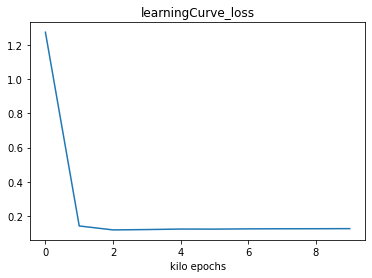

In [15]:
epochtimes = 10000
mini_batch = 16
bestloss1 = 1e30 #Mini Batch Loss
preloss = 1e30   #decay the learning rate
start = time.time()

lossCurve = []

for epoch in range(epochtimes):
    X_train_random = []
    Y_train_random = []
    for i in range(mini_batch):
        rindex = random.randint(0,len(X_train)-1)
        X_train_random.append(X_train[rindex,:])
        Y_train_random.append(Y_train[rindex,:])
    X_train_random = np.array(X_train_random)
    Y_train_random = np.array(Y_train_random)
    
   
        
    input_hidden = np.dot(X_train_random, weight_hidden) + bias
    output_hidden = ReLU(input_hidden)
    
    input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
    output_hidden2 = ReLU(input_hidden2)
    input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
    output_hidden3 = ReLU(input_hidden3)
    input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
    output_hidden4 = ReLU(input_hidden4)
    input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
    output_hidden5 = ReLU(input_hidden5)
    input_op = np.dot(output_hidden5, weight_output)+ bias5
    output_op = Sigmoid(input_op)
   
    
    #==========================================
    
    derror_douto = output_op - Y_train_random
    douto_dino = Sigmoid_der(input_op)
    dino_dwo = output_hidden5      
    derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
    derror_dbias5 = derror_douto * douto_dino
    
    #==========================================
    
    derror_dino = derror_douto * douto_dino
    dino_douth5 = weight_output
    derror_douth5 = np.dot(derror_dino, dino_douth5.T)
    douth5_dinh5 = ReLU_der(input_hidden5)
    dinh5_dwh5 = output_hidden4
    derror_dwh5 = np.dot(dinh5_dwh5.T, douth5_dinh5 * derror_douth5)
    derror_dbias4 = douth5_dinh5 * derror_douth5
      
    #==========================================
    
    derror_dinh5 = derror_douth5 * douth5_dinh5
    dinh5_douth4 = weight_hidden5
    derror_douth4 = np.dot(derror_dinh5, dinh5_douth4.T)
    douth4_dinh4 = ReLU_der(input_hidden4)
    dinh4_dwh4 = output_hidden3
    derror_dwh4 = np.dot(dinh4_dwh4.T, douth4_dinh4 * derror_douth4)
    derror_dbias3 = douth4_dinh4 * derror_douth4
        
    #==========================================
    
    derror_dinh4 = derror_douth4 * douth4_dinh4
    dinh4_douth3 = weight_hidden4
    derror_douth3 = np.dot(derror_dinh4, dinh4_douth3.T)
    douth3_dinh3 = ReLU_der(input_hidden3)
    dinh3_dwh3 = output_hidden2
    derror_dwh3 = np.dot(dinh3_dwh3.T, douth3_dinh3 * derror_douth3)
    derror_dbias2 = douth3_dinh3 * derror_douth3
        
    #==========================================
    
    derror_dinh3 = derror_douth3 * douth3_dinh3
    dinh3_douth2 = weight_hidden3
    derror_douth2 = np.dot(derror_dinh3, dinh3_douth2.T)
    douth2_dinh2 = ReLU_der(input_hidden2)
    dinh2_dwh2 = output_hidden
    derror_dwh2 = np.dot(dinh2_dwh2.T, douth2_dinh2 * derror_douth2)
    derror_dbias1 = douth2_dinh2 * derror_douth2
        
    #==========================================
    
    derror_dinh2 = derror_douth2 * douth2_dinh2
    dinh2_douth = weight_hidden2
    derror_douth = np.dot(derror_dinh2, dinh2_douth.T)
    douth_dinh = ReLU_der(input_hidden)
    dinh_dwh = X_train_random
    derror_dwh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)    
    derror_dbias = douth_dinh * derror_douth
    
    #==========================================
       
    
    
    weight_hidden = weight_hidden-lr * derror_dwh
    weight_hidden2 = weight_hidden2-lr * derror_dwh2
    weight_hidden3 = weight_hidden3-lr * derror_dwh3
    weight_hidden4 = weight_hidden4-lr * derror_dwh4
    weight_hidden5 = weight_hidden5-lr * derror_dwh5
    weight_output = weight_output-lr * derror_dwo
    
    bias -= lr * derror_dbias.sum()/np.size(derror_dbias)
    bias1 -= lr * derror_dbias1.sum()/np.size(derror_dbias1)
    bias2 -= lr * derror_dbias2.sum()/np.size(derror_dbias2)
    bias3 -= lr * derror_dbias3.sum()/np.size(derror_dbias3)
    bias4 -= lr * derror_dbias4.sum()/np.size(derror_dbias4)
    bias5 -= lr * derror_dbias5.sum()/np.size(derror_dbias5)
           
        
    #calulate error 
    if epoch % 1000 == 0 : 
        input_hidden = np.dot(X_train, weight_hidden) + bias
        output_hidden = ReLU(input_hidden)
        input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
        output_hidden2 = ReLU(input_hidden2)
        input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
        output_hidden3 = ReLU(input_hidden3)
        input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
        output_hidden4 = ReLU(input_hidden4)
        input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
        output_hidden5 = ReLU(input_hidden5)
        input_op = np.dot(output_hidden5, weight_output)+ bias5
        output_op = Sigmoid(input_op)
        error_out = error(output_op, Y_train)
        
   
        #set decay for learning rate
        if error_out > preloss :
            lr *= 0.9
            
        preloss = error_out
        lossCurve.append(error_out/len(X_train))
        print("-------------")
        print('now training ',epoch*100/epochtimes,'%')
        print(error_out/len(X_train))
        #print(error_out)
        #print('\n',lr * derror_dwh,'\n', lr * derror_dwo,'\n')
        
       
        #print(derror_wh, derror_wo)


print("")
print("=====================================")
print("")

plt.plot(lossCurve)
plt.title('learningCurve_loss')
plt.xlabel('kilo epochs')

plt.show()
end = time.time()

In [16]:
input_hidden = np.dot(X_train, weight_hidden) 
output_hidden = ReLU(input_hidden)
input_hidden2 = np.dot(output_hidden, weight_hidden2) 
output_hidden2 = ReLU(input_hidden2)
input_hidden3 = np.dot(output_hidden2, weight_hidden3) 
output_hidden3 = ReLU(input_hidden3)
input_hidden4 = np.dot(output_hidden3, weight_hidden4) 
output_hidden4 = ReLU(input_hidden4)
input_hidden5 = np.dot(output_hidden4, weight_hidden5) 
output_hidden5 = ReLU(input_hidden5)
input_op = np.dot(output_hidden5, weight_output)
output_op = Sigmoid(input_op)
error_out = error_out = error(output_op, Y_train)

print('result: ')
print(error_out)

result: 
34.32153565283018


In [17]:
single_point = np.array(X_train)
result1 = np.dot(single_point, weight_hidden) + bias
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2) + bias1
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3) + bias2
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4) + bias3
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5)+ bias4 
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output) + bias5
result12 = Sigmoid(result11)
#print(result12)
#print(Y_train_random)
error_out = error_out = error(result12, Y_train)
#print(error_out)
print(error_out)
print(result12)

34.168043575529445
[[6.23575815e-03]
 [5.38886355e-06]
 [9.99999289e-01]
 [9.99426208e-01]
 [5.58362613e-04]
 [4.73735815e-06]
 [1.99164432e-05]
 [9.99793306e-01]
 [9.99596282e-01]
 [1.08940250e-05]
 [2.28382584e-05]
 [9.99578818e-01]
 [3.38289347e-03]
 [8.82967072e-05]
 [1.69753636e-04]
 [9.99956326e-01]
 [1.41977375e-05]
 [1.79090107e-03]
 [5.59871781e-03]
 [9.99361094e-01]
 [1.25140922e-02]
 [3.97027238e-05]
 [3.11406880e-03]
 [5.43567660e-04]
 [9.88395027e-05]
 [6.64096704e-06]
 [3.05398382e-05]
 [3.00351270e-05]
 [1.59659980e-03]
 [9.70111435e-01]
 [9.84408977e-01]
 [1.00000000e+00]
 [5.39361708e-04]
 [9.94882187e-01]
 [5.38096676e-05]
 [1.08858876e-03]
 [9.99960680e-01]
 [7.14578813e-03]
 [1.04208643e-03]
 [9.91128926e-01]
 [9.99931831e-01]
 [9.84281365e-01]
 [9.65661338e-06]
 [1.05337268e-04]
 [7.55463277e-06]
 [3.37102472e-03]
 [9.99194687e-01]
 [7.39036348e-05]
 [1.39721251e-04]
 [9.93426655e-01]
 [1.00000000e+00]
 [9.99997902e-01]
 [9.96773153e-01]
 [8.19009334e-06]
 [1.00654

In [18]:
print("bias:",bias )
print("bias1:",bias1 )
print("bias2:",bias2 )
print("bias3:",bias3 )
print("bias4:",bias4 )
print("bias5:",bias5 )

bias: 0.010279554876326015
bias1: 0.010356997741179196
bias2: 0.010169539969962109
bias3: 0.010037759964897362
bias4: 0.010277490773325825
bias5: 0.016152123853608435


In [19]:
single_point = np.array(X_test)
result1 = np.dot(single_point, weight_hidden)
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2)
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3)
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4)
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5)
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output)
result12 = Sigmoid(result11)
print(result12)
print(Y_test)
print(len(X_test))
error_out = error(result12, Y_test)


[[1.70462948e-04]
 [1.09541166e-05]
 [4.33348619e-03]
 [8.29713622e-02]
 [9.99524896e-01]
 [7.30598103e-03]
 [2.30865481e-06]
 [9.98495990e-01]
 [5.55673280e-05]
 [4.59246349e-05]
 [2.92948681e-05]
 [1.69496909e-01]
 [6.25756167e-01]
 [2.84992473e-01]
 [3.85881989e-04]
 [3.94924822e-05]
 [7.65416980e-01]
 [1.29554523e-03]
 [9.08863374e-01]
 [4.48633294e-05]
 [1.01659017e-01]
 [4.71883606e-06]
 [8.41543094e-05]
 [2.75641164e-05]
 [1.72162749e-05]
 [6.81136336e-06]
 [9.99970806e-01]
 [3.95160493e-01]
 [1.42779581e-02]
 [3.22947162e-01]
 [7.71802574e-01]
 [4.39497815e-01]
 [9.61824632e-01]
 [9.99920094e-01]
 [4.58029816e-05]
 [2.23504686e-02]
 [3.81226090e-04]
 [1.31208239e-05]
 [3.28859185e-06]
 [4.46343658e-04]
 [9.99867645e-01]
 [2.51434347e-01]
 [9.99785947e-01]
 [1.45512754e-03]
 [1.80996611e-01]
 [9.99968901e-01]
 [9.99994240e-01]
 [9.99916423e-01]
 [8.55492062e-06]
 [2.39175921e-05]
 [9.75748194e-01]
 [9.01463029e-05]
 [3.35462788e-04]
 [9.61824632e-01]
 [8.65655426e-01]
 [4.316309

In [20]:
single_point = np.array(X_test)
result1 = np.dot(single_point, weight_hidden)
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2) 
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3)
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4) 
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5)
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output) 
result12 = ReLU(result11)
print(result12)
print(Y_test)
print(len(X_test))
error_out = error(result12, Y_test)
print(math.sqrt(error_out))

[[-0.0867682212278505]
 [-0.11421784272561906]
 [-0.05437040032977179]
 [-0.02402643187131905]
 [7.65150223834153]
 [-0.04911729147097066]
 [-0.12978843227416642]
 [6.498115012269752]
 [-0.09797859586301709]
 [-0.0998846295038327]
 [-0.10438068912069132]
 [-0.015891969594336867]
 [0.5140532417774804]
 [-0.009198303028757345]
 [-0.07859593006714603]
 [-0.10139360735393321]
 [1.1826112012199168]
 [-0.06647527262653811]
 [2.299835019108538]
 [-0.10011844949563471]
 [-0.021789254699596926]
 [-0.12263943668077616]
 [-0.09382774269780533]
 [-0.10498968196763775]
 [-0.10969638192035618]
 [-0.11896911447274425]
 [10.441504055102563]
 [-0.004256711532852027]
 [-0.042346574533594666]
 [-0.007402605916065203]
 [1.218517624710267]
 [-0.0024320039719602526]
 [3.226641636019444]
 [9.434575112680903]
 [-0.09991115565329561]
 [-0.03778303968259245]
 [-0.0787173664768301]
 [-0.11241296861481359]
 [-0.12625047804131878]
 [-0.07713974925370166]
 [8.929893223848119]
 [-0.010909770032025772]
 [8.4490731012

ValueError: math domain error